In [1]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"


lambda_range=0
with_r=True

In [2]:
# matplotlib.rcParams.update({'font.size': 11}) # before plotting coode
# plt.figure(figsize=(6.2,5))
# ...
# plt.tight_layout()
# plt.subplots_adjust(hspace=0,wspace=0) # if doing multiple panels/subplots
# plt.savefig('namee.pdf', bbox_inches='tight')

In [3]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import fitsio as fio
import numpy as np
import ast

import astropy.cosmology
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from IPython.display import display, Math
from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
#This header file contains all the common packages
%matplotlib inline
%run -i /home/adt35/des_y1_catalog/sa-master/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/adt35/des_y1_catalog/sa-master/lib/src/func.py  
%run -i /home/adt35/des_y1_catalog/sa-master/lib/src/corr_func.py

sources= pd.read_pickle("/home/adt35/des_y1_catalog/sa-master/data/BPZ.pkl") #load BPZ catalog
LRGs=pd.read_pickle("/home/adt35/des_y1_catalog/sa-master/data/shape_BPZ.pkl")
LRGs_index=LRGs.index
LRGs=None

In [5]:
sources

Band             All                                                         \
Data              e1        e2 flags_select          RA       DEC    mean_z   
ID                                                                            
3007825738 -0.067457 -0.108823            0  318.189343  0.373614  0.592499   
3007825739 -0.241395 -0.168924            0  317.966101  0.373698  1.144830   
3007825742 -0.003933  0.491628            0  317.586931  0.373745  0.493385   
3007825768 -0.005586 -0.118534            0  318.013978  0.374081  1.024960   
3007825777 -0.019404  0.043441            0  317.534582  0.374336  0.417675   
3007825782  0.026634 -0.058019            0  317.695343  0.374407  0.402666   
3007825783 -0.033715 -0.092800            0  317.792764  0.374437  0.286514   
3007825796  0.308792  0.189660            0  317.951839  0.374632  0.516869   
3007825807 -0.116207  0.307729            0  317.677388  0.374833  0.617100   
3007825818  0.187048 -0.048863            0  317.693493  0.375026  0.559859   
3007825822 -0.007033 -0.060629            0  318.027863  0.375058  0.654103   
3007825823 -0.123909  0.378170            0  317.907731  0.375083  0.743356   
3007825827  0.148846  0.274625            0  317.699737  0.375196  0.708027   
3007825828 -0.010033 -0.085264            0  317.962669  0.375208  0.832671   
3007825832  0.070431 -0.100097            0  318.087228  0.375267  0.442264   
3007825834  0.090797 -0.264701            0  318.191079  0.375244  0.599483   
3007825836 -0.145212 -0.039775            0  317.528614  0.375247  0.683162   
3007825837 -0.115260  0.079659            0  318.171436  0.375357  0.502652   
3007825838  0.205645  0.105596            0  318.189317  0.375313  0.765477   
3007825842 -0.262027  0.076544            0  317.805796  0.375329  0.673887   
3007825843 -0.143363  0.149926            0  317.694912  0.375342  0.435193   
3007825850 -0.026665  0.065753            0  317.807689  0.375486  0.661472   
3007825851  0.150281 -0.358096            0  317.998121  0.375501  1.429755   
3007825852  0.124884 -0.096431            0  317.914321  0.375562  0.802727   
3007825862  0.028173 -0.057648            0  317.649652  0.375743  0.801719   
3007825886 -0.176252  0.528390            0  317.575331  0.375869  0.414163   
3007825900  0.003242 -0.163389            0  317.809286  0.376293  0.513399   
3007825909 -0.311655 -0.022167            0  317.808549  0.375961  0.593586   
3007825910 -0.102074 -0.061182            0  317.556543  0.376406  0.644119   
3007825913  0.173998 -0.679847            0  317.961697  0.376404  0.610580   
...              ...       ...          ...         ...       ...       ...   
3172249069 -0.122954 -0.192837            0  150.172423  2.508570  0.619132   
3172249080 -0.235120 -0.092990            0  150.336490  2.500164  0.460496   
3172249084 -0.062804 -0.130103            0  149.980111  2.512144  1.332275   
3172249088  0.011829 -0.012960            0  150.290335  2.500175  0.756493   
3172249094 -0.157146 -0.082074            0  150.126813  2.499556  0.863487   
3172249108  0.010354 -0.013494            0  149.913851  2.510961  0.666288   
3172249110  0.111537 -0.209932            0  150.165640  2.500690  0.853431   
3172249111 -0.169103 -0.084554            0  150.352138  2.504447  1.004194   
3172249112 -0.183506  0.383276            0  149.687961  2.514540  0.506982   
3172249116  0.431095 -0.117019            0  149.957553  2.505254  0.867897   
3172249124 -0.094954 -0.046962            0  150.321133  2.505998  0.692146   
3172249131 -0.105977 -0.387835            0  150.185700  2.502039  0.648460   
3172249148  0.048572  0.210010            0  150.386018  2.500438  1.253664   
3172249149  0.015684  0.155072            0  149.888019  2.509013  0.760428   
3172249155  0.242944  0.155902            0  150.148049  2.502703  1.294657   
3172249164 -0.455431  0.124188            0  150.033016  2.502947  0.451812   
3172249169 -0.274541  0.127608            0  149.9

In [6]:
print("The number of total sources is {}".format(len(sources)))
print("The number of LRGs is {}".format(len(LRGs_index)))

The number of total sources is 34714036
The number of LRGs is 105029


In [7]:
NBINS=10

z_bins=np.arange(0.2,0.67,0.15)
lambda_bins=np.append(np.arange(20,66,15),1000)

print(z_bins)
print(lambda_bins)

[0.2  0.35 0.5  0.65]
[  20   35   50   65 1000]


In [8]:
woRedMask=~np.isin(sources.index,LRGs_index)

In [9]:
print("The number of sources excluding LGRs is {}".format(np.sum(woRedMask)))
print("The number of LRG sources being cut is {}".format(np.sum(~woRedMask)))

The number of sources excluding LGRs is 34609603
The number of LRG sources being cut is 104433


In [10]:
lambda_bins[-1]

1000

In [11]:
def get_ng_source(_clusters,_sources,_shapes,z_lower=z_bins[0],z_upper=z_bins[-1],lambda_lower=lambda_bins[0],lambda_upper=lambda_bins[-1],foreback=False,woRed=False,multi=True):
#     print(len(_clusters))

#     print(_clusters)
    
    if multi==False:
        assert len(_clusters)==1
        clusters_masked=_clusters
    else:
        assert len(_clusters)!=1
        clusters_z_mask=(_clusters[('All','All','Z_LAMBDA')]>=z_lower)&(_clusters[('All','All','Z_LAMBDA')]<=z_upper)
        clusters_lambda_mask=(_clusters[('All','All','LAMBDA_CHISQ')]>=lambda_lower)&(_clusters[('All','All','LAMBDA_CHISQ')]<=lambda_upper)
        combined_mask=clusters_z_mask&clusters_lambda_mask
        clusters_masked=_clusters[combined_mask]
        
        
    
    
    if woRed==True:
        _sources=_sources[woRedMask]
        
        
        
    center_id=clusters_masked[('Alt','Alt1','ID_CENT')]
    centers=_shapes.loc[center_id]
    
#     print(center_id)
#     print(centers)
    
    
    
    
    assert ~np.any(np.isnan(centers[('All','RA')]))
    
#     print("The number of clusters is {}".format(len(clusters_masked)))
#     print("The number of sources is {}".format(len(sources)))
    
    
    UPPER_BOUND=10
    distance=('All','angR')


#     if mode1 == "s":
#         def get_cluster_cen(cluster):
#             return (get_unique_center_for_cluster(cluster))
#         def get_cluster_sats(cluster):
#             cen_mat_id=cluster.name
#             cen_id=cluster[('Alt','Alt1','ID_CENT')]
            

            
#             if source==True:
#                 sats=members
                
#             else: 
#                 sats=members[members['All','MEM_MATCH_ID']==cen_mat_id]
                         
#             sats=sats[sats.index!=cen_id]
#             return (sats)
#     elif mode1=='r':
#         def get_cluster_sats(cluster):
#             return(shapes)
#         def get_cluster_cen(cluster):
#             return (random)

#     else:
#         raise


    cen=centers
    sats=sources
    
#     if foreback=="back":
#         sats=sats[(sats[('All','mean_z')]-z_upper)>=0.1]
#         print("The number of background sources is {}".format(len(sats)))
#     elif foreback=="fore":
#         sats=sats[(z_lower-sats[('All','mean_z')])>=0.1]
#         print("Calculating foreground sources")
#         print(sats[('All','mean_z')].mean())
#         print("The number of foreground sources is {}".format(len(sats)))

    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]
    

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()
        




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')
    
    MINSEP=0.1
    BINSLOP=0.1
        

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=MINSEP, max_sep=UPPER_BOUND, bin_slop=BINSLOP,
                               metric="Rperp")
    

    ng.process(cen_cat,sats_cat)

    return(ng)

In [12]:
## lambda x z = 4x3
import gc

# def get_ng_values(clusters,members,z_bins_low,z_bins_high,lambda_bins_low,lambda_bins_high,foreback):
#     ng=get_ng_source(clusters,members,z_bins_low,z_bins_high,lambda_bins_low,lambda_bins_high,foreback)
#     ng_values=np.copy(np.array([ng.meanlogr,ng.xi,ng.varxi]))
    
#     del ng
    
#     return(ng_values)
    
ng_matrix=[[None for i in range(4)] for j in range(3)]

for i in trange(3):
    for j in trange(4):
        ng=get_ng_source(clusters,sources,shapes,z_bins[i],z_bins[i+1],lambda_bins[j],lambda_bins[j+1],foreback="")
        ng_values=np.copy(np.array([ng.meanlogr,ng.xi,ng.varxi]))
        ng_matrix[i][j]=ng_values
        del ng
        gc.collect()

In [13]:
np.save("/home/adt35/des_y1_catalog/sa-master/data/gammaT/ng_matrix.npy",ng_matrix)
ng_matrix=None

In [14]:
## lambda x z = 4x3
ng_wr_matrix=[[None for i in range(4)] for j in range(3)]

import gc


for i in trange(3): #z bins
    for j in trange(4): # lambda bins
        ng=get_ng_source(clusters,sources,shapes,z_bins[i],z_bins[i+1],lambda_bins[j],lambda_bins[j+1],foreback="",woRed=True)
        ng_values=np.copy(np.array([ng.meanlogr,ng.xi,ng.varxi]))
        ng_wr_matrix[i][j]=ng_values
        del ng
        gc.collect()

In [15]:
np.save("/home/adt35/des_y1_catalog/sa-master/data/gammaT/ng_wr_matrix.npy",ng_wr_matrix)
ng_wr_matrix=None

# Plot

In [16]:
ng_matrix=np.load("/home/adt35/des_y1_catalog/sa-master/data/gammaT/ng_matrix.npy");
ng_wr_matrix=np.load("/home/adt35/des_y1_catalog/sa-master/data/gammaT/ng_wr_matrix.npy");

In [17]:
nclusters=np.arange(12).reshape(3,4)

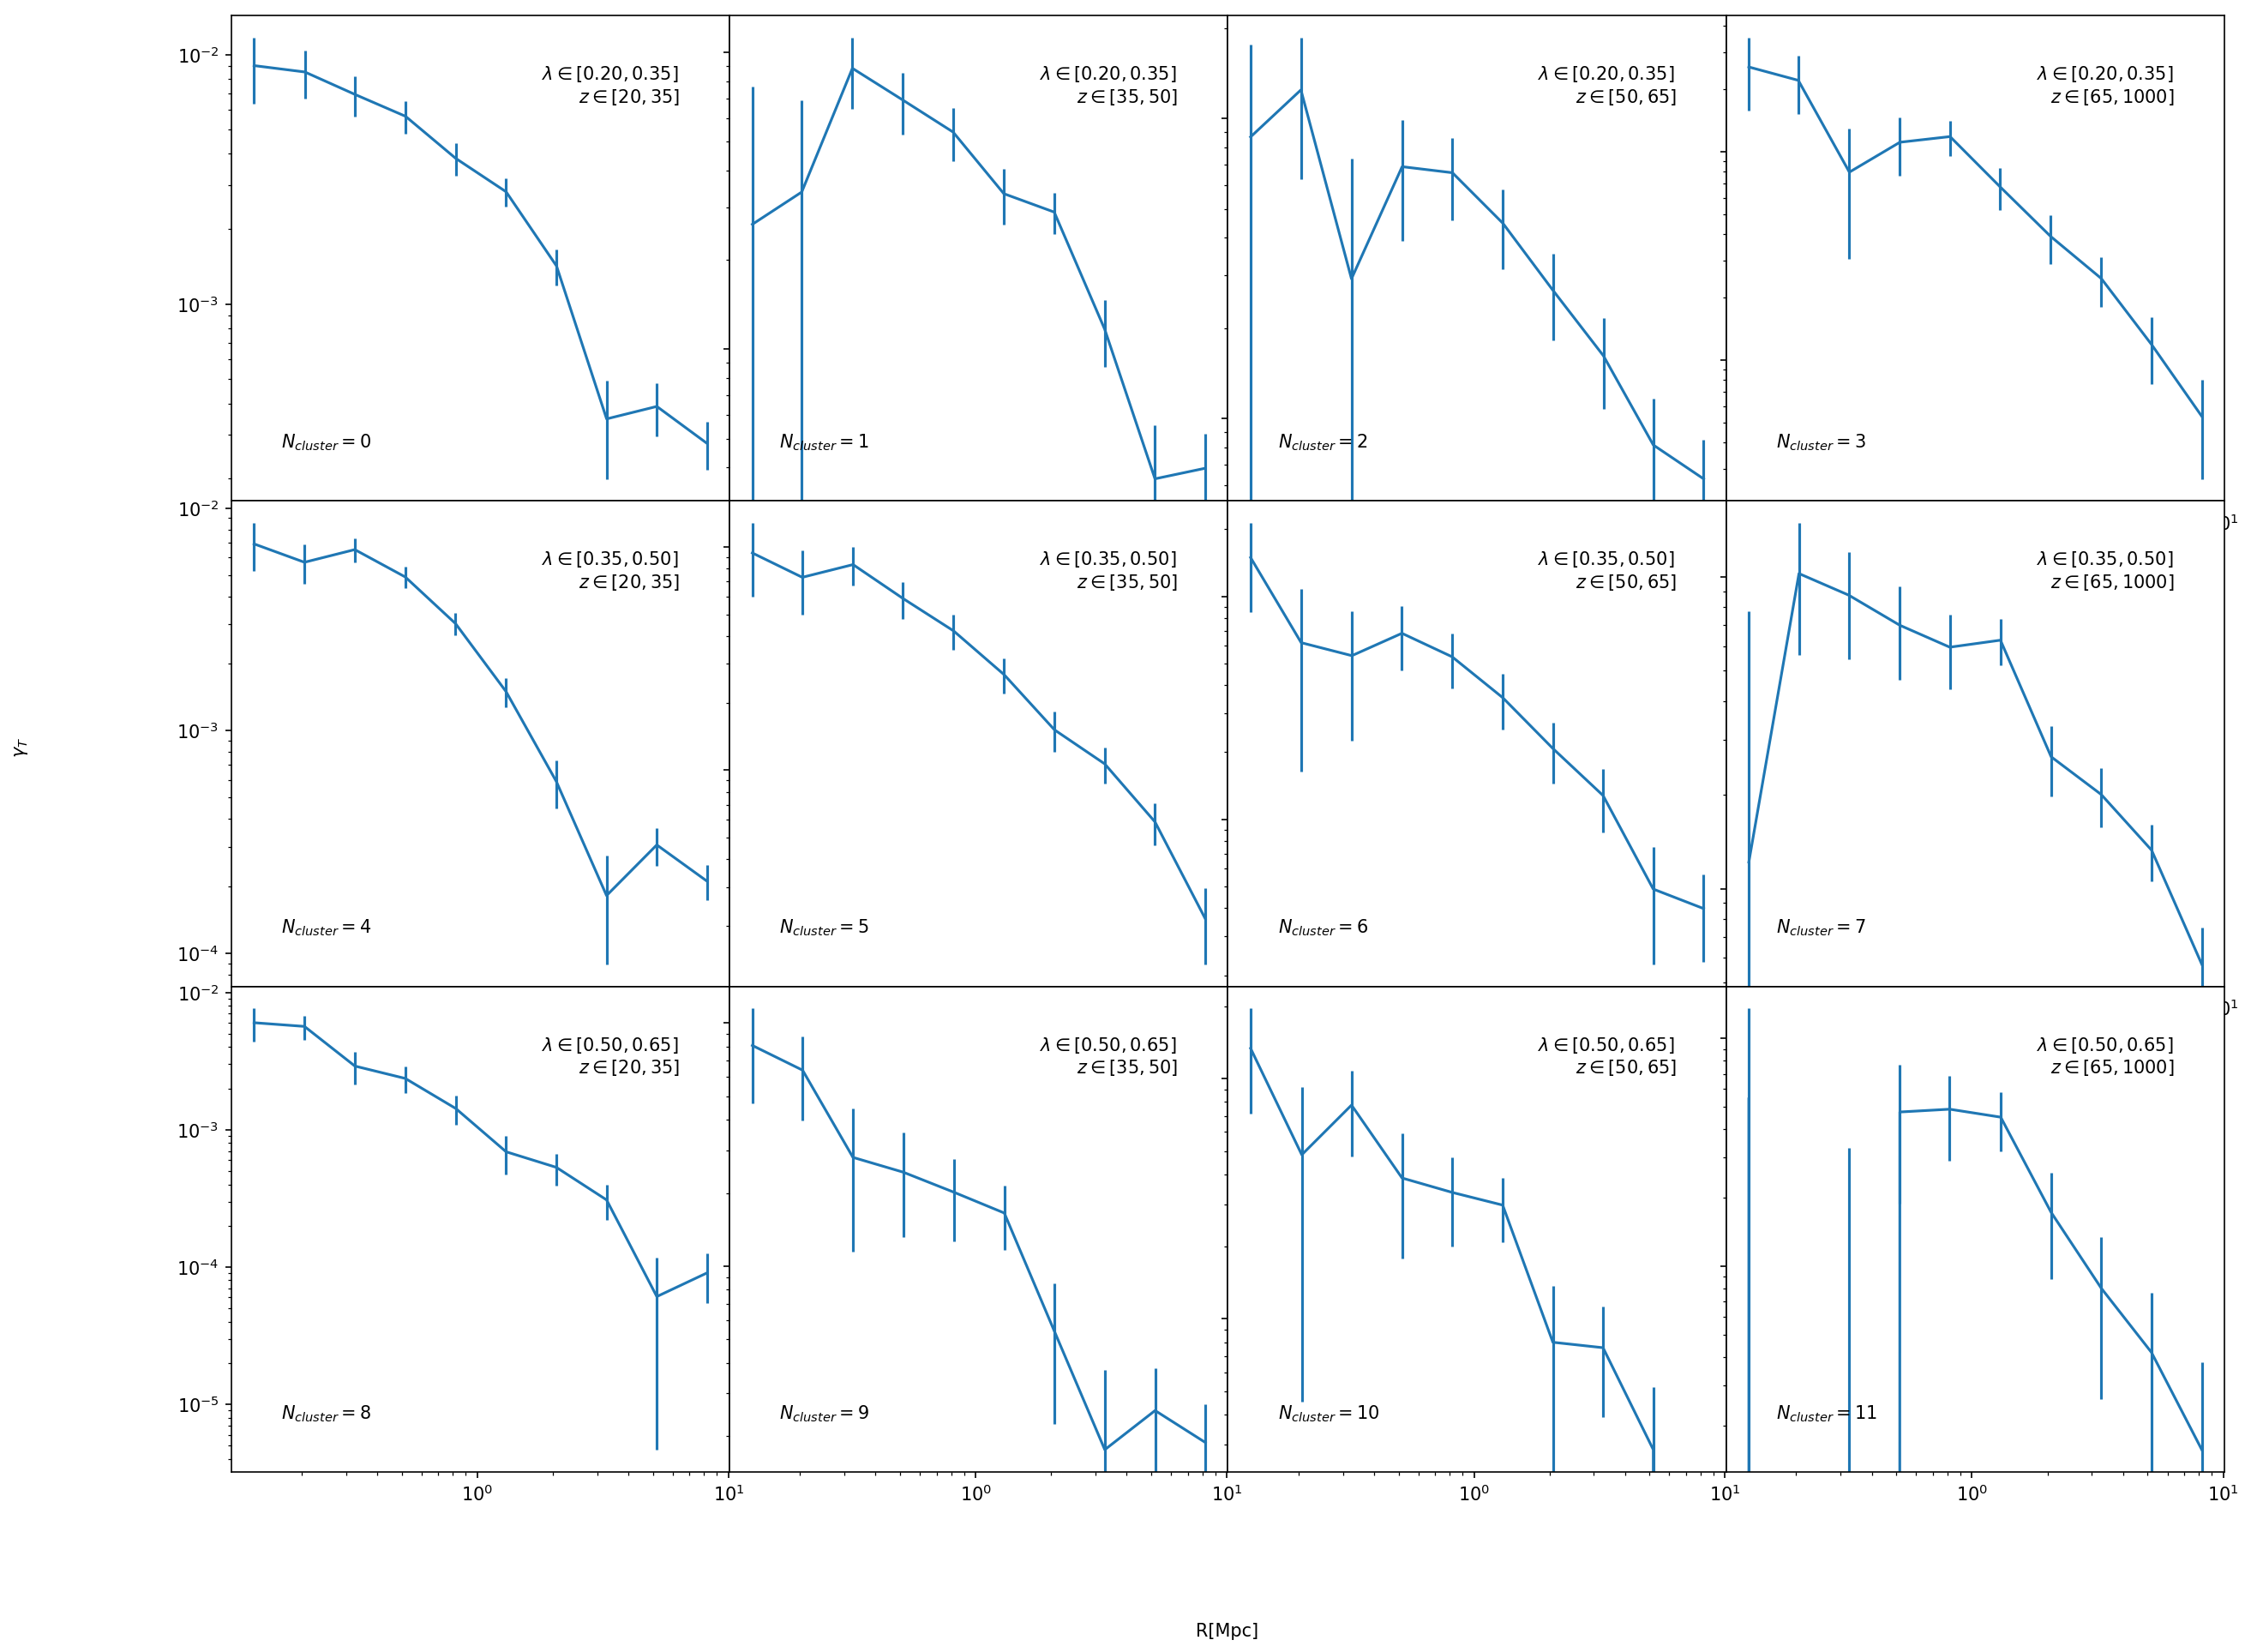

In [18]:
fig, axs = plt.subplots(3, 4,figsize=(20,15),gridspec_kw = {'wspace':0, 'hspace':0},dpi=150)
for i in range(3):
    for j in range(4):
        values=ng_matrix[i][j]
        values_wr=ng_wr_matrix[i][j]
#         axs[i,j].errorbar(np.exp(values[0]),values[1],yerr=np.sqrt(values[2]),label="All sources")
        axs[i,j].errorbar(np.exp(values[0]),values_wr[1],yerr=np.sqrt(values_wr[2]),label="wo/ redMaPPer")
        axs[i,j].set_xscale("log")
        axs[i,j].set_yscale("log")
        axs[i,j].loglog()
        axs[i,j].text(0.1,0.1,r"$N_{{cluster}}={}$".format(nclusters[i,j]),verticalalignment="bottom",
                     horizontalalignment="left",transform=axs[i,j].transAxes)
        axs[i,j].text(0.9,0.9,"$\lambda \in [{:.2f},{:.2f}]$ \n $z \in [{},{}]$".format(z_bins[i],z_bins[i+1],lambda_bins[j],lambda_bins[j+1]),
                      verticalalignment="top",
             horizontalalignment="right",transform=axs[i,j].transAxes)
        
        if j!=0:
            axs[i,j].set_yticklabels([])

# fig.set_xlabel("test")

fig.text(0.5,0.04,"R[Mpc]")
fig.text(0.04,0.5,"$\gamma_T$",rotation="vertical")
fig.subplots_adjust(wspace=None, hspace=None)
#         axs[0,3].legend()
#         axs.xscale("log")
#         axs[i,j].plot(np.exp(values_wr[0]),values_wr[1])

# Jackknife variance

In [19]:
get_xi_meanlogr_varxi_npairs

<function __main__.get_xi_meanlogr_varxi_npairs(cluster, mode1, mode2)>

In [20]:
mask_array=[[None for i in range(4)] for j in range(3)]
mask_array

[[None, None, None, None], [None, None, None, None], [None, None, None, None]]

In [21]:
mask_array[1][2]

In [22]:
def get_binned(_clusters):
    mask_array=[[None for i in range(4)] for j in range(3)]
    
    for i in trange(4): #lambda bins
        for j in trange(3): #z bins
            z_lower,z_upper=z_bins[j],z_bins[j+1]
            lambda_lower,lambda_upper=lambda_bins[i],lambda_bins[i+1]
            
            clusters_z_mask=(_clusters[('All','All','Z_LAMBDA')]>=z_lower)&(_clusters[('All','All','Z_LAMBDA')]<=z_upper)
            clusters_lambda_mask=(_clusters[('All','All','LAMBDA_CHISQ')]>=lambda_lower)&(_clusters[('All','All','LAMBDA_CHISQ')]<=lambda_upper)
            combined_mask=clusters_z_mask&clusters_lambda_mask
            mask_array[j][i]=combined_mask
    return (mask_array)

In [23]:
binned_mask=get_binned(clusters)

In [26]:
def get_jk_single(i,j,_binned_mask):
    ng_dict={}

    import gc
    
    _clusters=clusters[_binned_mask[j][i]]
    
    print(len(_clusters))
    
    for i in trange(len(_clusters)):
        cluster=_clusters.iloc[[i]]
        ng=get_ng_source(cluster,sources,shapes,multi=False)
        ng_dict[cluster.index.to_numpy()[0]]=[cluster[('All','All','Z_LAMBDA')].to_numpy()[0],cluster[('All','All','LAMBDA_CHISQ')].to_numpy()[0],ng.xi,ng.meanlogr,ng.npairs]
        del ng
        gc.collect()
        
    ng_df=pd.DataFrame.from_dict(ng_dict,orient='index')
    ng_df.to_pickle("/home/adt35/des_y1_catalog/sa-master/data/gammaT/jk_lensing_{}_{}.pkl".format(i,j))
    

In [27]:
get_jk_single(0,0,binned_mask)

371


KeyboardInterrupt: 

In [ ]:
def ng_df_to_list(ng_df):
    for i,row in ng_df.iterrows():
        ng_vals=np.array([row.xi,ng.meanlogr,ng.varxi,ng.npairs]
        ng_list=np.empty([length,4,NBINS])
        ng_list

In [ ]:
def get_cov_for_panel(i,j):
    z_lower,z_upper=z_bins[i,i+1]
    lambda_lower,lambda_upper=lambda_bins[j,j+1]
    
    clusters_z_mask=(_clusters[('All','All','Z_LAMBDA')]>=z_lower)&(_clusters[('All','All','Z_LAMBDA')]<=z_upper)
    clusters_lambda_mask=(_clusters[('All','All','LAMBDA_CHISQ')]>=lambda_lower)&(_clusters[('All','All','LAMBDA_CHISQ')]<=lambda_upper)
    combined_mask=clusters_z_mask&clusters_lambda_mask
    
    
    ng_list=    ng_list=np.empty([length,4,NBINS])


In [ ]:
def get_cov(ng_list):
    
    
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    if N!=0:
    
        jk_xi_array=np.empty([N,NBINS])

        def get_xi(drop_1_xi,drop_1_npairs):
            return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))

        for i in range(N):
            drop_1_xi=np.delete(xi_array,i,axis=0)
            drop_1_npairs=np.delete(npairs_array,i,axis=0)
            jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)

            mean=np.mean(jk_xi_array,axis=0)
            
        jk_cov=np.empty([NBINS,NBINS])
        
        for i in range(NBINS):
            for j in range(NBINS):
                jk_cov[i,j]=(1-1/N)*np.sum((jk_xi_array[:,i]-mean[i])*(jk_xi_array[:,j]-mean[j]))
        return(jk_cov)
    else:
        return(0*np.ones(NBINS))